Five Classes Vertical Translation. Bidimensional.
100 batches of 228 instances



METHOD: Static lp as classifier
Execution time:  0.4744303230000071
Average error: 54.22
Average macro-F1: 0.35533072251664505
Average micro-F1: 0.45319999999999994
Average Accuracy:  45.78
Standard Deviation:  18.855049986674658
Variance:  355.51291000000003


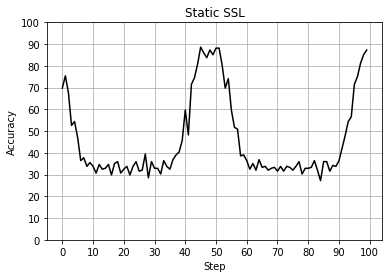

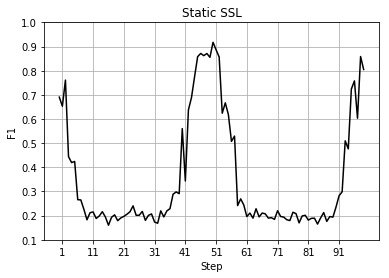

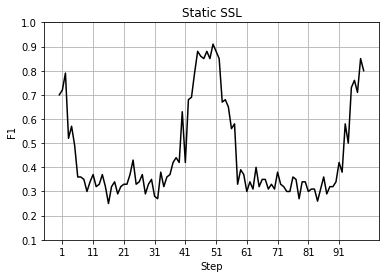




METHOD: Sliding lp as classifier
Execution time:  0.37402637699999275
Average error: 65.7244
Average macro-F1: 0.1143800746494198
Average micro-F1: 0.34559999999999996
Average Accuracy:  34.27559999999999
Standard Deviation:  5.372223993840913
Variance:  28.860790640000005


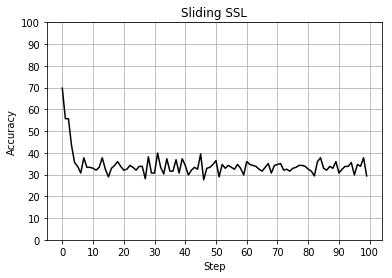

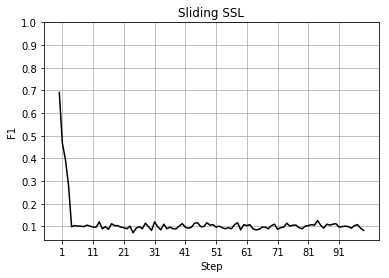

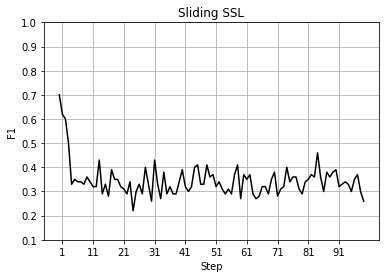




METHOD: Incremental lp as classifier
Execution time:  9.054980896999993
Average error: 54.78180000000001
Average macro-F1: 0.34393431074778513
Average micro-F1: 0.4477999999999999
Average Accuracy:  45.21819999999999
Standard Deviation:  18.011773004343574
Variance:  324.4239667599999


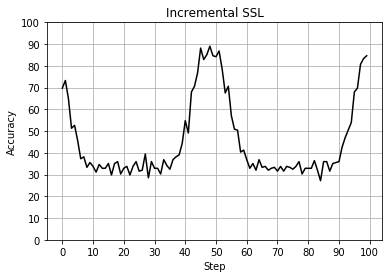

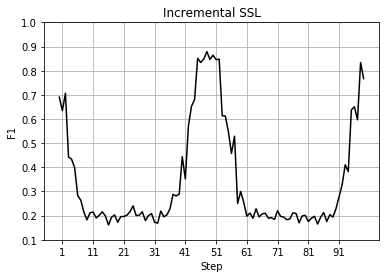

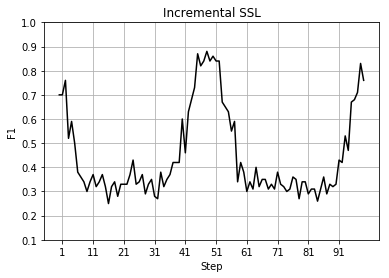




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  0.7474014459999978
Average error: 58.8812
Average macro-F1: 0.34952301470544733
Average micro-F1: 0.4144
Average Accuracy:  41.1188
Standard Deviation:  26.000021164606768
Variance:  676.0011005599998


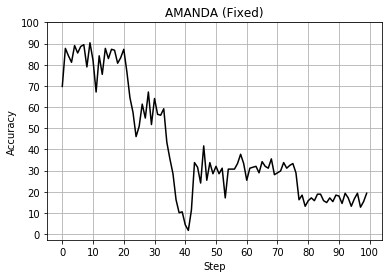

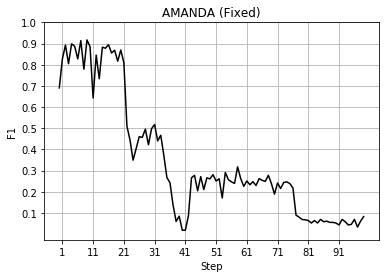

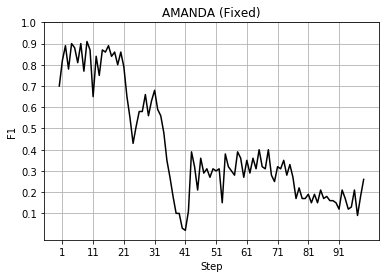




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
AMANDA-DCP Hellinger | Mean keeping percentage=0.33 | Std keeping percentage=0.17
Execution time:  0.7663783490000071
Average error: 60.73700000000001
Average macro-F1: 0.1871055387955722
Average micro-F1: 0.3962
Average Accuracy:  39.26299999999999
Standard Deviation:  12.014659420890798
Variance:  144.35204099999999


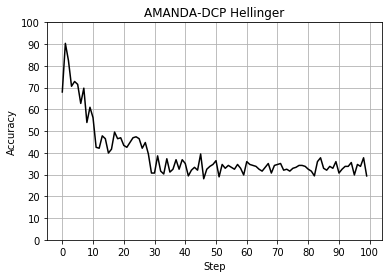

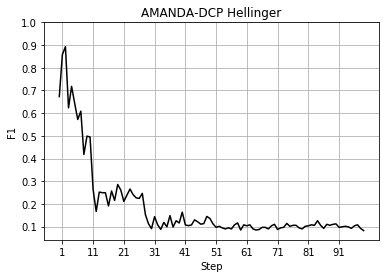

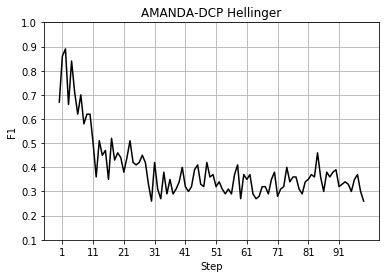




METHOD: lp as classifier and kde and Hellinger2 distance as dynamic CSE
AMANDA-DCP Hellinger2 | Mean keeping percentage=0.19 | Std keeping percentage=0.04
Execution time:  0.8030285110000079
Average error: 75.7366
Average macro-F1: 0.17811939194634538
Average micro-F1: 0.2397
Average Accuracy:  24.263400000000004
Standard Deviation:  20.210552353659217
Variance:  408.46642644000013


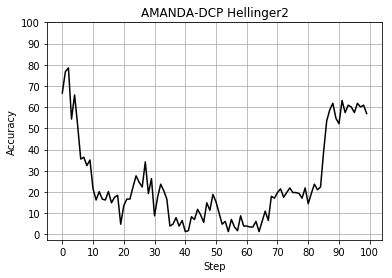

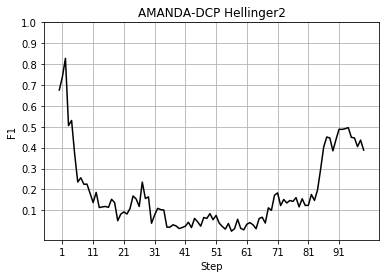

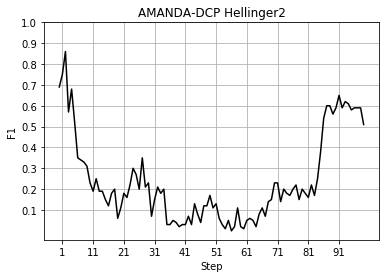




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = -1.000 | Mean keeping percentage=0.24 | Std keeping percentage=0.14
Execution time:  0.762869914999996
Average error: 75.6401
Average macro-F1: 0.1656184057454765
Average micro-F1: 0.2411000000000001
Average Accuracy:  24.359899999999996
Standard Deviation:  22.678048085979537
Variance:  514.2938649900001


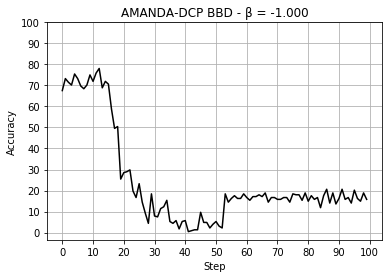

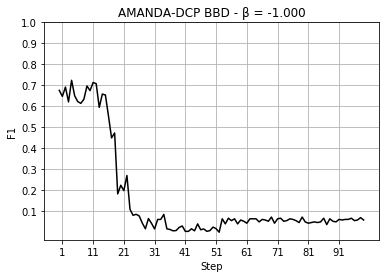

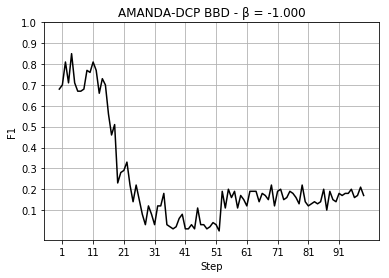




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 2.000 | Mean keeping percentage=0.12 | Std keeping percentage=0.04
Execution time:  0.8123684020000042
Average error: 70.22380000000001
Average macro-F1: 0.2686212526102862
Average micro-F1: 0.2975
Average Accuracy:  29.776199999999996
Standard Deviation:  31.074521646519358
Variance:  965.6258955600001


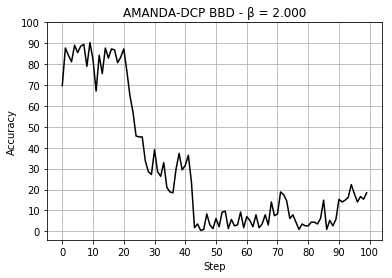

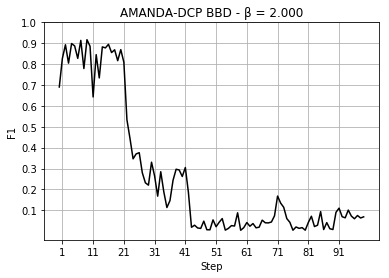

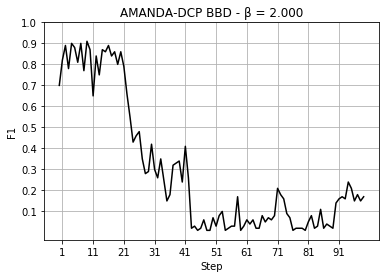




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 3.000 | Mean keeping percentage=0.13 | Std keeping percentage=0.05
Execution time:  0.8143459770000021
Average error: 47.46020000000001
Average macro-F1: 0.4463437220989372
Average micro-F1: 0.5318
Average Accuracy:  52.53979999999999
Standard Deviation:  21.636953897441295
Variance:  468.15777396000004


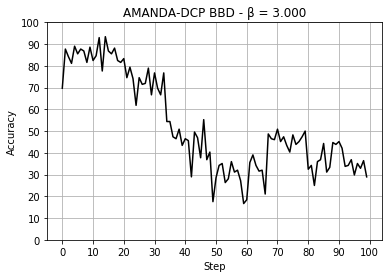

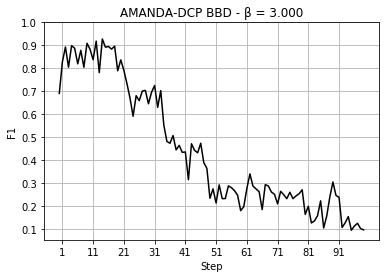

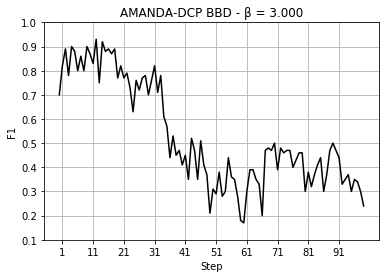




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 10.000 | Mean keeping percentage=0.14 | Std keeping percentage=0.10
Execution time:  0.8821700579999998
Average error: 52.3551
Average macro-F1: 0.4430229550378074
Average micro-F1: 0.4809999999999999
Average Accuracy:  47.6449
Standard Deviation:  32.27512198257351
Variance:  1041.6834989899999


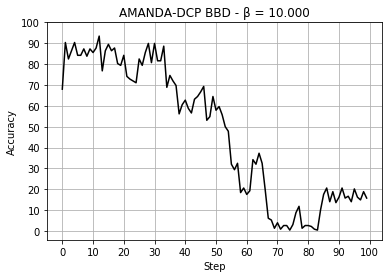

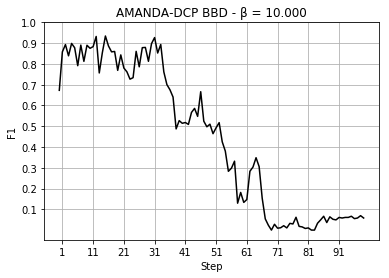

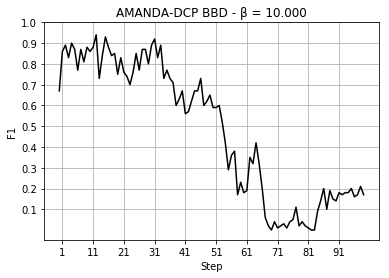

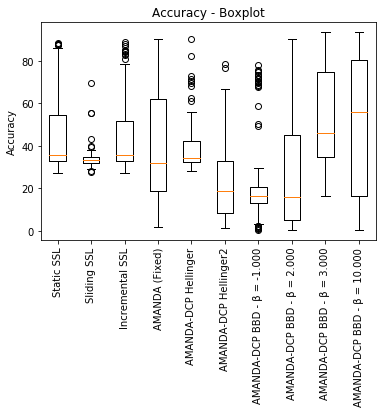

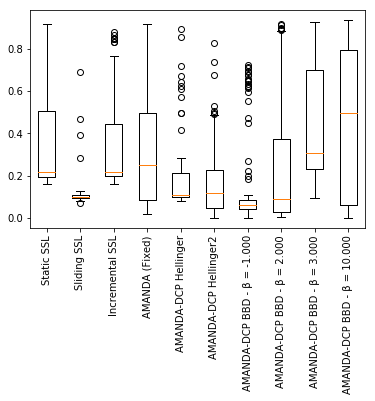

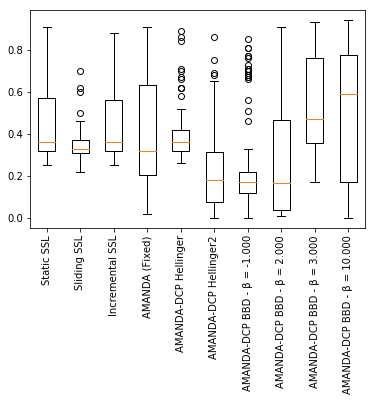

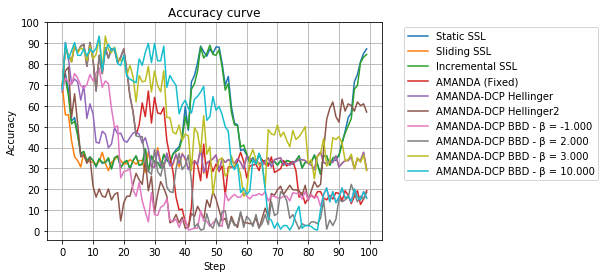

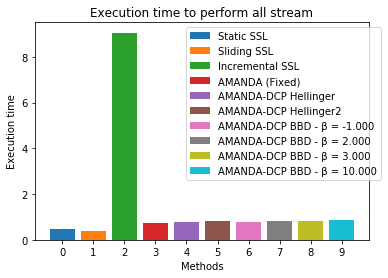

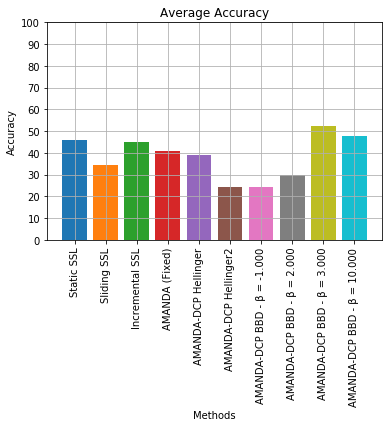

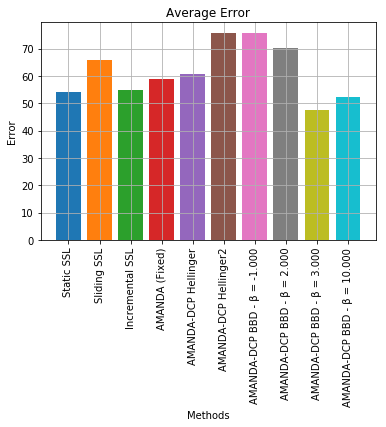

Pos 7 - Error reduction (Sliding SSL):-25.12975098296202
Pos 4 - Error reduction (Incremental SSL):-1.2271734381826394
Pos 5 - Error reduction (AMANDA (Fixed)):-10.181738750546092
Pos 6 - Error reduction (AMANDA-DCP Hellinger):-14.235474006116231
Pos 10 - Error reduction (AMANDA-DCP Hellinger2):-46.99999999999999
Pos 9 - Error reduction (AMANDA-DCP BBD - β = -1.000):-46.78920926168634
Pos 8 - Error reduction (AMANDA-DCP BBD - β = 2.000):-34.95806028833553
Pos 1 - Error reduction (AMANDA-DCP BBD - β = 3.000):14.765836609873286
Pos 2 - Error reduction (AMANDA-DCP BBD - β = 10.000):4.073612931411094


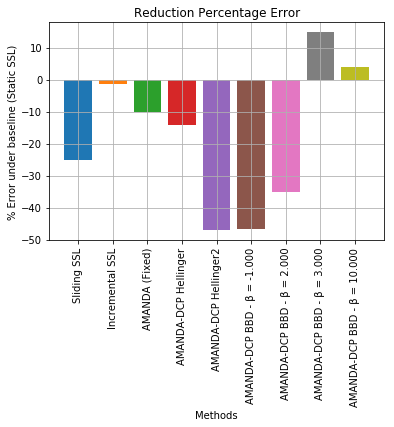

In [1]:
%matplotlib inline
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[4])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None, distanceMetric=None, beta=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K
        self.distanceMetric = distanceMetric
        self.beta = beta


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = False
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.load5CVT(path, sep)
    
    # 5% of initial labeled data
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 8, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 8, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 8, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 8, 0.9, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - DCP Original)
    experiments[4] = Experiment(amanda_dynamic, 7, None, "kde", sslClassifier, 'Hellinger')
    
    # Proposed method 3 (AMANDA - DCP Hellinger2)
    experiments[5] = Experiment(amanda_dynamic, 5, None, "kde", sslClassifier, 'Hellinger2')                         
    
    # Proposed method 4 (AMANDA - DCP BBD)
    lastIndex = list(experiments.keys())[-1]
    betas = [-1, 2, 3, 10]
    bestK = [10, 8, 8, 7]
    
    for i in range(len(betas)):
        experiments[lastIndex+1+i] = Experiment(amanda_dynamic, bestK[i], None, "kde", sslClassifier, 'BBD', beta=betas[i])
    
    # Proposed method 5 (AMANDA - DCP HDDDM)
    #experiments[17] = Experiment(amanda_dynamic, 8, None, "kde", sslClassifier, 'HDDDM')


    # COMPOSE GMM (Python version)
    #experiments[5] = Experiment(compose_gmm_version, 8)
    
    # levelIw matlab results
    #predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '5CVT', steps)
    #externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()